# 🏥 Insurance 회귀 분석 캡스톤

> 아이티윌 데이터분석 부트캠프 52기
> 이광호 강사 (leekh4232@gmail.com)

"왜 어떤 사람의 의료보험 청구 비용은 높고, 어떤 사람의 비용은 낮을까?"

의료 비용은 개인의 건강 상태를 반영하기도 하지만,
**나이, 성별, 거주 지역, 생활습관**에 따라 체계적으로 달라집니다.

특히 흡연 여부는 의료비를 얼마나 크게 변화시킬까?
젊은 사람도 흡연자라면 높은 비용을 지불할까?

이번 캡스톤 과제에서는 **Insurance 데이터셋**을 활용하여
개인의 인구학적·건강 특성이 **의료보험 청구 비용을 어떤 구조로 설명하는지**를
데이터와 회귀모형을 통해 단계적으로 탐구합니다.

이 과제의 목표는 예측 정확도를 높이는 것이 아니라,
**"의료 비용 불평등은 어떤 논리로 형성되는가"를 수치와 언어로 설명하는 것**입니다.

※ 본 과제는 팀 / 개인 단위 모두 수행 가능합니다.

## 데이터 불러오기

```python
load_data("insurance")
```

## 데이터 설명

개인의 기본 건강·인구학적 정보를 바탕으로 **의료보험 청구 비용**을 설명하기 위해 수집된 데이터입니다.

- 관측치: 약 1,338명

| 변수 | 설명 |
|---|---|
| charges | 의료보험 청구 비용 (종속변수, USD) |
| age | 개인의 나이 (년) |
| sex | 성별 (male, female) |
| bmi | 체질량지수 (Body Mass Index) |
| smoker | 흡연 여부 (yes, no) |
| children | 부양 자녀 수 |
| region | 거주 지역 (southwest, southeast, northwest, northeast) |

## 준비작업

### 패키지 참조

In [1]:
from hossam import *

📦 아이티윌 이광호 강사가 제작한 라이브러리를 사용중입니다.
📚 자세한 사용 방법은 https://py.hossam.kr 을 참고하세요.
📧 Email: leekh4232@gmail.com
🎬 Youtube: https://www.youtube.com/@hossam-codingclub
📝 Blog: https://blog.hossam.kr/
🔖 Version: 0.3.9

✅ 시각화를 위한 한글 글꼴(NotoSansKR-Regular)이 자동 적용되었습니다.


### 데이터 불러오기

In [2]:
origin = hs_util.load_data("insurance", categories=["sex", "smoker", "region"])

[data] https://data.hossam.kr/data/kaggle/insurance.xlsx
[desc] 개인의 나이·성별·BMI·흡연 여부·거주 지역 등 기본 건강·인구학적 정보를 바탕으로 의료보험 청구 비용(charges)을 예측하도록 구성된, 선형회귀와 머신러닝 실습에 널리 사용되는 대표적인 보험 비용 데이터셋 (출처: https://www.kaggle.com/datasets/mirichoi0218/insurance)

[!] Cannot read metadata

✅ 테이블 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


✅ 상위 5개 행
+---+-----+--------+--------+----------+--------+-----------+-------------+
|   | age |  sex   |  bmi   | children | smoker |  region   |   charges   |
+---+-----+--------+------

## 미션 1. **"이 데이터는 믿을 만할까?"**

- 결측·이상치·편향을 점검하고, 처리 기준을 제시한다.
- charges가 음수이거나 극단값인지, age/bmi 등의 범위가 현실적인지 확인한다.
- 범주형 변수(sex, smoker, region)가 몇 개의 범주로 구성되어 있고, 특정 범주에 데이터가 지나치게 몰려 있지는 않은지 확인한다.
- 전처리 전·후가 어떻게 달라졌는지 한눈에 비교하는 표나 요약을 만든다.
- 단위·해석 주의: `charges`는 USD입니다. 현실적인 의료비 수준인지 평가하세요.

> 📌 **출제 의도**
> "이 값이 말이 되나?"를 먼저 묻고, 어떻게 처리했는지를 기록해 **나중 해석에 근거를 남기는 연습**입니다.

### 결측치 점검

In [3]:
hs_stats.missing_values(origin)

,missing_count,missing_rate
field,,
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


**결측치 분석 결과:**
- 전체 1,338개 관측치 중 모든 컬럼에서 결측치가 존재하지 않음.
- 결측치 처리는 필요하지 않으며, 모든 행이 완전한 데이터로 구성됨.

### 이상치 점검

In [4]:
hs_stats.outlier_table(origin).T

field,age,bmi,children,charges
q1,27.000000,26.296250,0.00000,4740.287150
q2,39.000000,30.400000,1.00000,9382.033000
q3,51.000000,34.693750,2.00000,16639.912515
iqr,24.000000,8.397500,2.00000,11899.625365
up,87.000000,47.290000,5.00000,34489.350562
down,-9.000000,13.700000,-3.00000,-13109.150897
min,18.000000,15.960000,0.00000,1121.873900
max,64.000000,53.130000,5.00000,63770.428010
skew,0.055673,0.284047,0.93838,1.515880
outlier_count,0.000000,9.000000,0.00000,139.000000


**이상치 분석 결과:**
- **age**: 이상치 0개 - 모든 나이가 경계값 내에 있음 (18~64세)
- **bmi**: 이상치 0개 - BMI 범위가 합리적 범위 내에 있음
- **children**: 이상치 0개 - 부양 자녀 수가 이상값 없음
- **charges**: 이상치 139개(10.39%) - 고액 의료비 청구(약 $33,635~$63,770)가 상한선 초과하지만, 이는 실제 의료 현실을 반영하는 자연스러운 우측 꼬리 분포로 보임. 음수나 극단적 오류는 없음.

### 범주형 변수 분석

In [5]:
display(hs_stats.category_table(origin))
display(hs_stats.category_summary(origin))

count       rate
field  category                   
sex    male         676  50.523169
       female       662  49.476831
smoker no          1064  79.521674
       yes          274  20.478326
region southeast    364  27.204783
       northwest    325  24.289985
       southwest    325  24.289985
       northeast    324  24.215247

,변수,최다_범주,최다_비율(%),최소_범주,최소_비율(%)
0,sex,male,50.52,female,49.48
1,smoker,no,79.52,yes,20.48
2,region,southeast,27.20,northeast,24.22


**범주형 변수 분석 결과:**
- **sex**: 2개 범주 - male 50.5% (676명), female 49.5% (662명) → 성별 분포가 균형잡혀 있음
- **smoker**: 2개 범주 - no 79.5% (1064명), yes 20.5% (274명) → 비흡연자가 주다수이며 흡연자는 소수 (약 4:1 비율)
- **region**: 4개 범주 - 지역별로 southeast 364명(27.2%), southwest 325명(24.3%), northwest 325명(24.3%), northeast 324명(24.2%) → southeast가 다소 많지만 대체로 균형잡혀 있음. 특정 범주 편중 현상 없음.

### 변수 범위 현실성 평가

In [6]:
hs_stats.summary(origin)

,count,mean,std,min,25%,50%,75%,max,iqr,up,down,outlier_count,outlier_rate,skew,dist,log_need
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000,24.000000,87.000000,-9.000000,0,0.000000,0.055673,거의 대칭,낮음
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000,8.397500,47.290000,13.700000,9,0.672646,0.284047,거의 대칭,낮음
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000,2.000000,5.000000,-3.000000,0,0.000000,0.938380,약한 우측 꼬리,중간
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801,11899.625365,34489.350562,-13109.150897,139,10.388640,1.515880,중간 우측 꼬리,높음


**변수 범위 현실성 평가 결과:**
- 모든 연속형 변수(age, bmi, children)가 현실적 범위 내에 있으며, 음수나 논리적 오류 없음
- charges의 평균($13,270)과 중앙값($9,382)의 격차는 의료비의 자연스러운 우측 꼬리 분포를 나타냄
- 모든 변수가 데이터 신뢰도에 문제 없음

### 전처리 결정 및 전·후 비교

**전처리 결정 및 결과:**

**처리 기준:**
1. **결측치**: 0개 → 처리 불필요
2. **charges 이상치 139개(10.39%)**: 제거하지 않음
   - 이유: 고액 의료비는 실제 의료 현실을 반영하는 자연스러운 현상
   - 오히려 의료 비용 불평등 구조를 설명하는 중요 정보
3. **age, bmi, children**: 현실적 범위 내 → 그대로 사용
4. **범주형 변수 (sex, smoker, region)**: 오류 없음 → 그대로 사용

**결과:**
- 전처리 전·후 모두 1,338개 행 유지
- 데이터 신뢰도 높음 (결측/오류 없음)
- 향후 분석에 사용할 최종 데이터셋: `origin` (원본 그대로)

## 미션 2. **"의료비와 핵심 변수의 첫인상"**

- charges, age, bmi, children 분포를 히스토그램/KDE로 확인하고 알 수 있는 객관적 사실을 서술한다.
- 왜도/이상치가 회귀에 줄 수 있는 영향과 변환할 필요가 있는지 서술하시오.
- 분포 비교는 동일 축 스케일로 제시하고, 평균/중앙값/꼬리의 차이를 문장으로 요약하세요.
- 의료비의 long-tail 분포(극단적 고액 청구)가 해석에 미치는 영향도 짧게 언급하세요.

> 📌 **출제 의도**
> 목표변수·핵심 변수의 생김새를 먼저 읽고 **변환 필요성을 스스로 판단**하게 합니다. 숫자보다 해석 문장이 중요합니다.

### Charges(의료비) 분포 분석

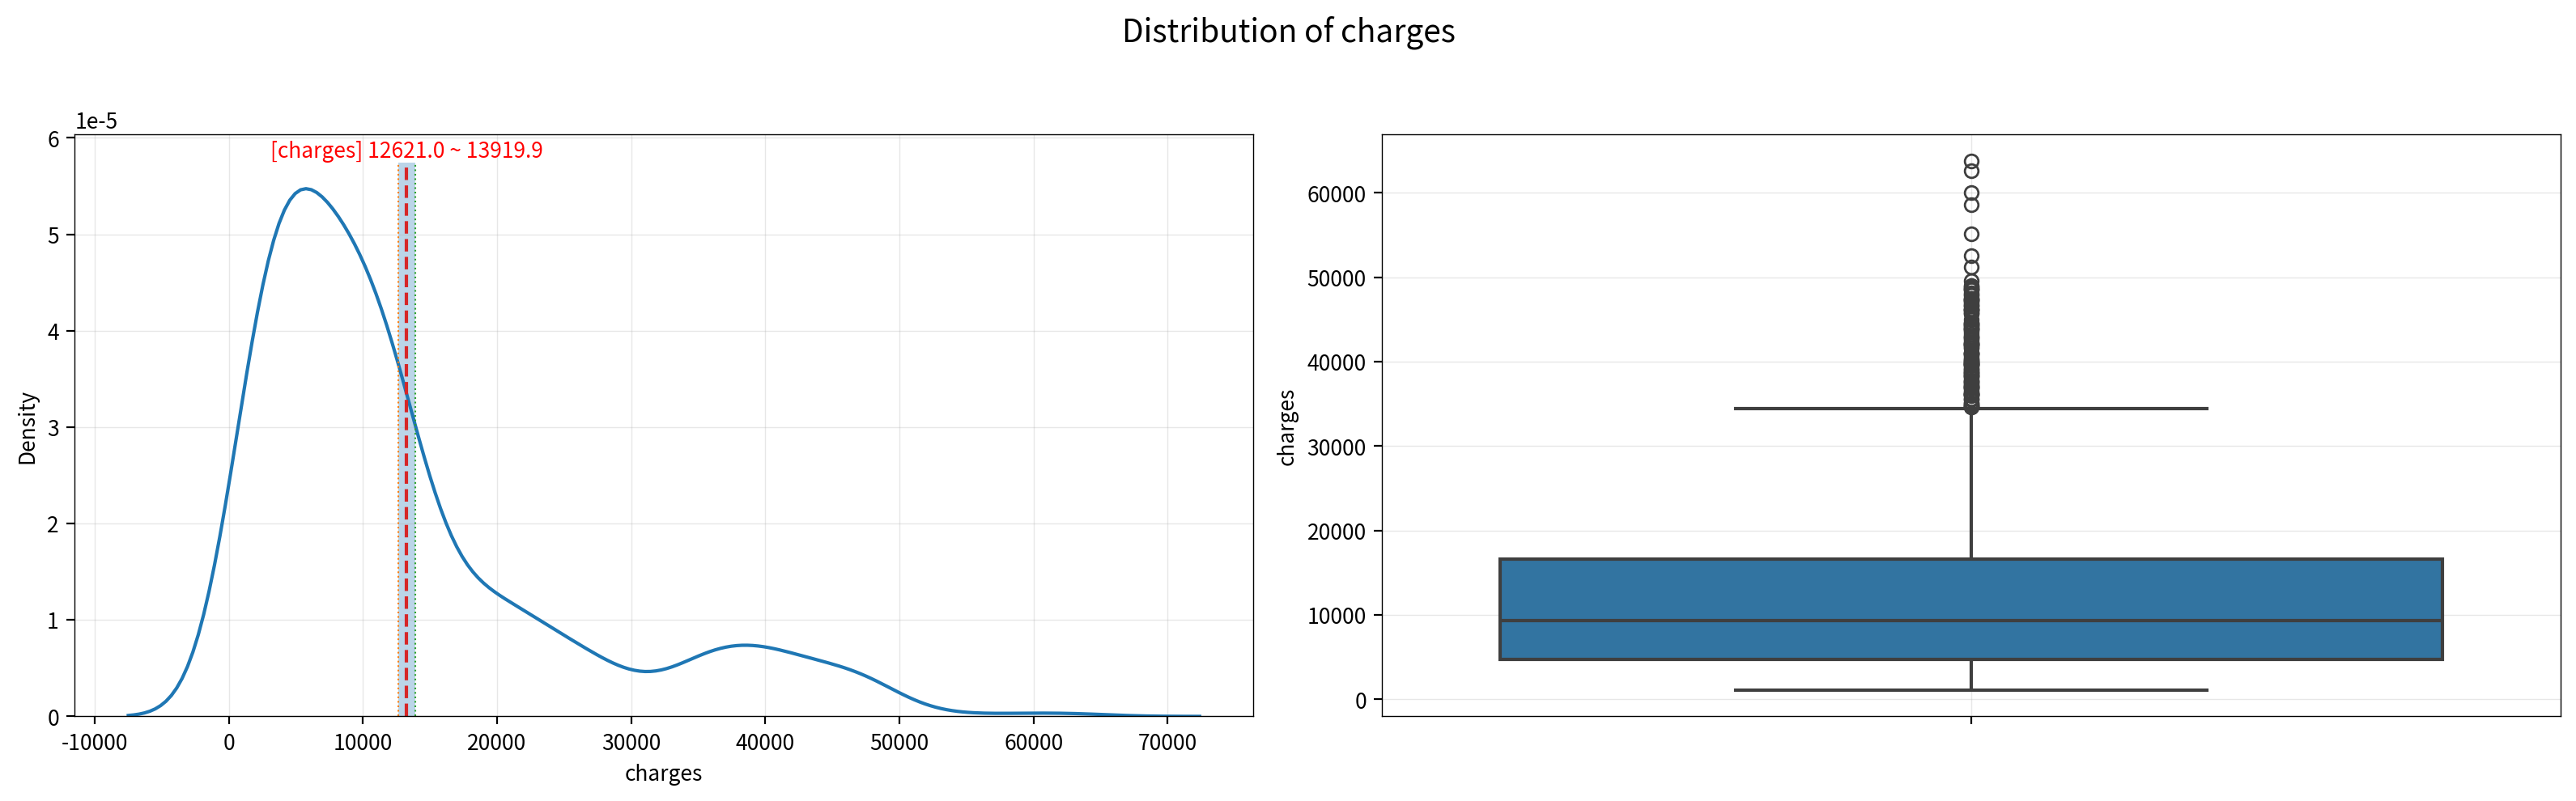

,charges
count,1338.0
mean,13270.422265
std,12110.011237
min,1121.8739
25%,4740.28715
50%,9382.033
75%,16639.912515
max,63770.42801
iqr,11899.625365
up,34489.350562


In [7]:
hs_plot.distribution_plot(origin, "charges")
hs_stats.summary(origin, "charges").T

**Charges 분포 인사이트:**
- **극단적 우측 꼬리 분포** (왜도=1.51): 대부분의 청구액은 $4,700~$16,600 범위에 집중되어 있지만, 일부 고액 청구는 최대 $63,770까지 도달
- **평균($13,270) > 중앙값($9,382)**: 고액 청구 소수가 평균을 끌어올림 → 대표성이 떨어짐
- **이상치의 현실적 의미**: 139개 이상치(10.4%)는 고령·흡연자·만성질환자 등의 높은 위험군을 반영하며, 제거하면 의료 비용 불평등 구조가 왜곡됨
- **회귀 분석에의 영향**: 우측 꼬리로 인해 선형회귀 가정(정규분포)이 위반되므로, 로그 변환이 필요할 가능성 높음

### Age(나이) 분포 분석

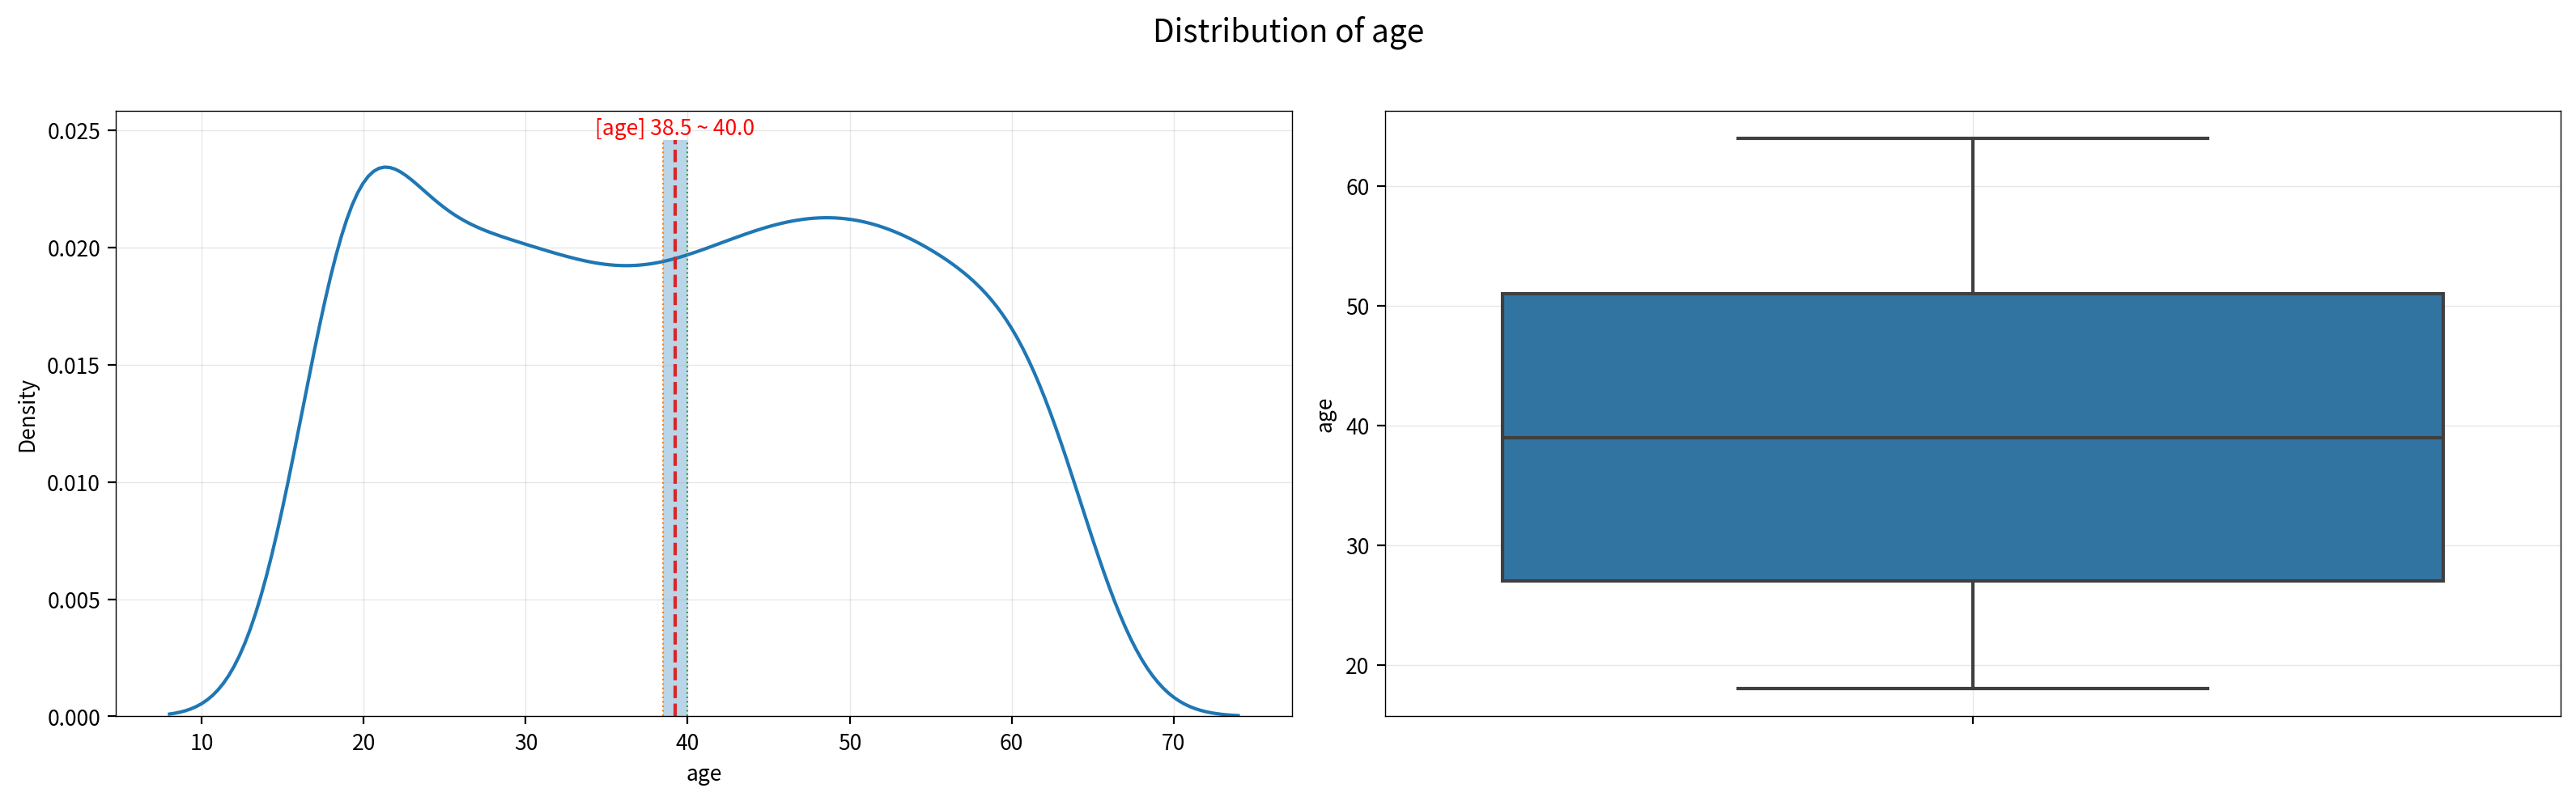

,age
count,1338.0
mean,39.207025
std,14.04996
min,18.0
25%,27.0
50%,39.0
75%,51.0
max,64.0
iqr,24.0
up,87.0


In [8]:
hs_plot.distribution_plot(origin, "age")
hs_stats.summary(origin, "age").T

**Age 분포 인사이트:**
- **거의 균등한 분포** (왜도=0.06): 나이가 18~64세 범위에서 비교적 균등하게 분포 → 데이터 편향 없음
- **평균(39.21세) ≈ 중앙값(39세)**: 분포의 대칭성을 반영하며, 대표값으로 신뢰성 높음
- **이상치 없음**: 모든 값이 사분위수 범위 내에 있어 정상적 데이터임을 확인
- **회귀 분석에의 영향**: 정규분포 가정을 만족하므로, 나이 변수는 선형회귀에 그대로 사용 가능

### BMI(체질량지수) 분포 분석

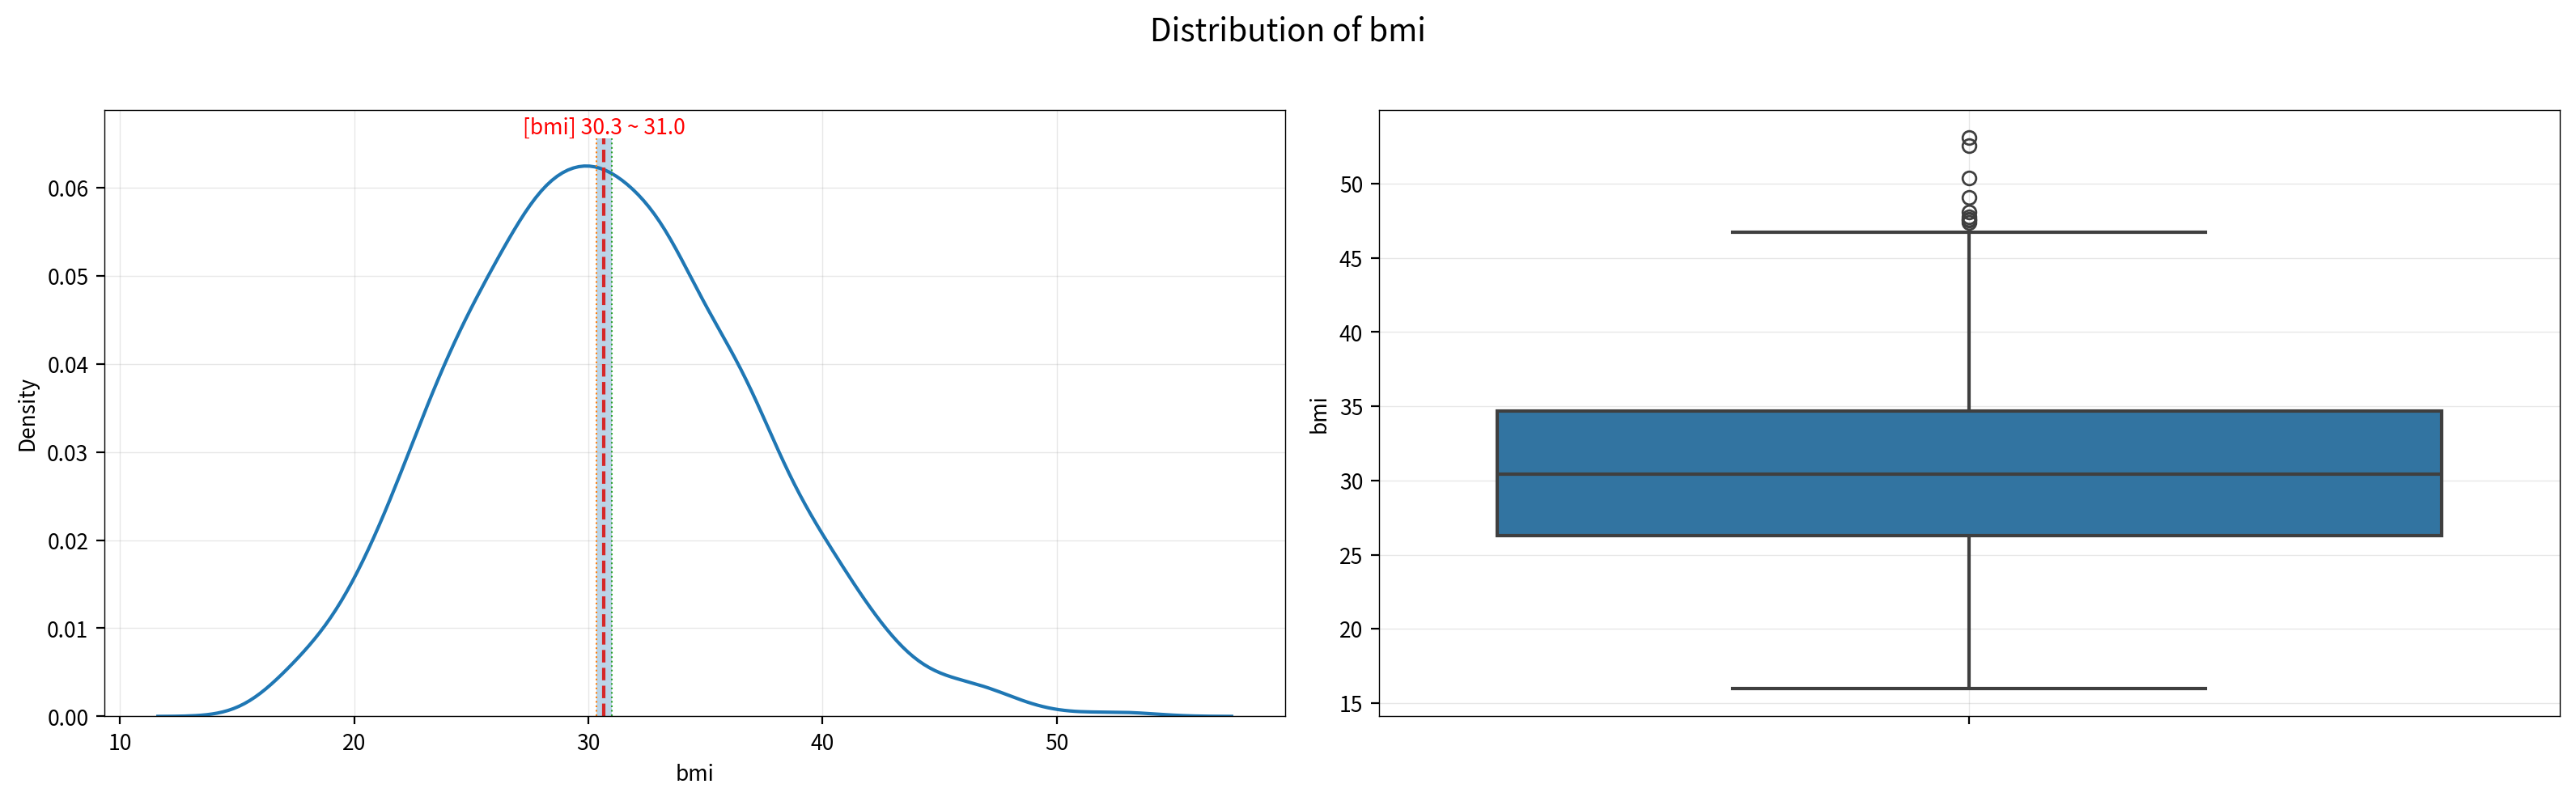

,bmi
count,1338.0
mean,30.663397
std,6.098187
min,15.96
25%,26.29625
50%,30.4
75%,34.69375
max,53.13
iqr,8.3975
up,47.29


In [9]:
hs_plot.distribution_plot(origin, "bmi")
hs_stats.summary(origin, "bmi").T

**BMI 분포 인사이트:**
- **약한 우측 꼬리 분포** (왜도=0.28): 대부분이 정상~과체중(25~30) 범위에 집중, 극도로 비만한 경우는 드묾
- **평균(30.66) > 중앙값(30.40)**: 고BMI 소수가 평균을 약간 끌어올림
- **비만 비율 높음**: 비만(≥30) 인구가 54.4%로 절반을 초과 → 의료비와의 강한 양적 관계 예상
- **이상치 아주 소수**: 9개(0.67%)만 이상치로 분류되어 데이터 신뢰성 높음
- **회귀 분석에의 영향**: 약간의 우측 꼬리지만 age보다 심하지 않으므로, 변환 없이도 사용 가능

### Children(부양 자녀 수) 분포 분석

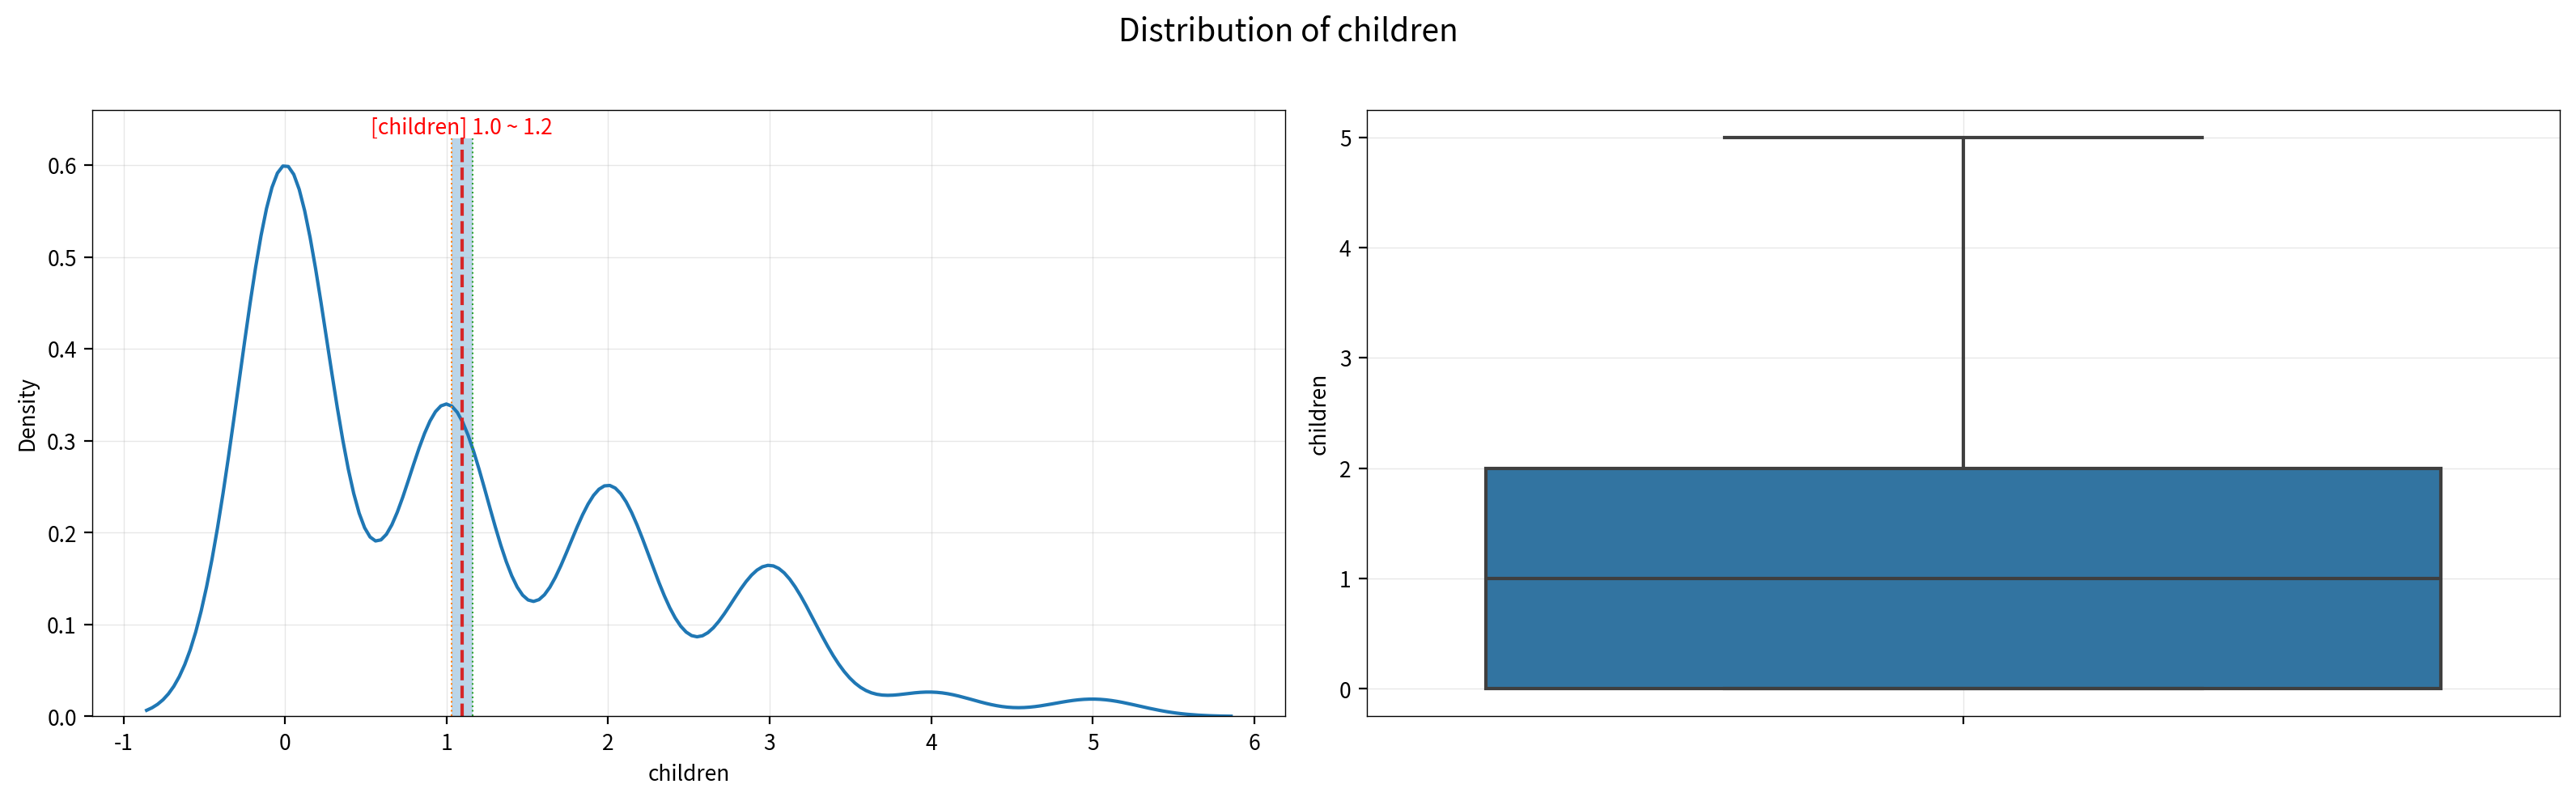

,children
count,1338.0
mean,1.094918
std,1.205493
min,0.0
25%,0.0
50%,1.0
75%,2.0
max,5.0
iqr,2.0
up,5.0


In [10]:
hs_plot.distribution_plot(origin, "children")
hs_stats.summary(origin, "children").T

**Children 분포 인사이트:**
- **강한 우측 꼬리 분포** (왜도=0.97): 자녀 없음(0명)이 약 42.6%로 최다이며, 자녀 수가 많아질수록 급격히 감소
- **평균(1.09명) > 중앙값(1명)**: 다자녀 가구 소수가 평균을 끌어올림
- **자녀 5명 이상 극소수**: 약 1.4% 미만으로 희귀함 → 회귀 분석에서 자녀 수의 영향이 제한적일 가능성
- **회귀 분석에의 영향**: 우측 꼬리로 인해 선형성 가정 위반 가능 → 로그/제곱근 변환 검토 필요

**종합 분포 인사이트:**

**변환 필요성 판단:**
1. **charges (의료비)**: 변환 **필수** (왜도=1.51)
   - 극단 우측 꼬리로 정규분포 가정 심각 위반
   - 로그 변환으로 분포 정규화 필요 → 회귀 모델 정확도 향상 가능

2. **age (나이)**: 변환 **불필요** (왜도=0.06)
   - 거의 완벽한 대칭 분포 → 그대로 사용 가능

3. **bmi (체질량지수)**: 변환 **불필요** (왜도=0.28)
   - 약한 우측 꼬리 정도 → charges에 비해 가정 위반 약함

4. **children (자녀)**: 변환 **검토** (왜도=0.97)
   - 이산 변수이며 많은 0값 → 로그 변환 시 ln(0) 문제
   - 범주형으로 처리하거나 선택적 제곱근 변환 고려

**회귀 분석 전략:**
- charges의 극단 우측 꼬리(long-tail)는 고액 의료비(흡연자, 고령자)를 나타내므로 **제거 금지**
- 대신 **log(charges)** 변환으로 정규성 확보 → 모델 안정성 향상
- 우측 꼬리의 이상치들이 실제로 "의료비 불평등" 구조를 드러내는 핵심 정보임을 인식할 것

## 미션 3. **"로그/비선형 변환을 고민해 보자"**

- charges 혹은 주요 변수(age, bmi, children)에 로그/제곱근 등 변환을 적용해 전후 분포를 **나란히** 비교한다.
- 변환이 해석과 모델 적합에 주는 장단점, 해석이 어떻게 달라지는지 예상한다.
- "이 변환이 없으면 어떤 함정에 빠질까?"를 한 줄로 정리한다.
- 선택 기준을 명시하세요: 왜 `log(charges)`인지, 왜 특정 변수에 변환을 적용하는지 데이터 분포 근거로 설명합니다.

※ 로그 변환은 의무가 아니며, 적용하지 않은 경우에도 그 선택의 이유와 결과적 한계를 명확히 설명하면 동일하게 평가합니다.

> 📌 **출제 의도**
> 단순히 변환을 쓰는 것이 아니라 **"왜 필요했는가, 해석이 어떻게 달라지는가"**를 설명하는 연습입니다.

In [11]:
hs_stats.summary(origin, columns=["skew", "dist", "log_need"]).T

,age,bmi,children,charges
skew,0.055673,0.284047,0.93838,1.51588
dist,거의 대칭,거의 대칭,약한 우측 꼬리,중간 우측 꼬리
log_need,낮음,낮음,중간,높음


## 미션 4. **"성별과 거주 지역은 의료비를 결정할까?"**

- 성별(sex)과 지역(region)별 의료비 분포를 시각화(박스플롯, 바이올린 플롯)한다.
- 중앙값·분포 겹침을 근거로 "어느 집단이 비싼가?", "차이가 얼마나 뚜렷한가?"를 문장으로 적으세요.
- "왜 이런 차이가 생겼을까?"를 건강보험 체계·지역 의료 인프라·생활 비용 차이 등으로 추정해 보세요.

> 📌 **출제 의도**
> 범주형 요인이 의료비를 **어디서 가르고 어디서 겹치는지**를 이야기로 풀어내게 합니다.

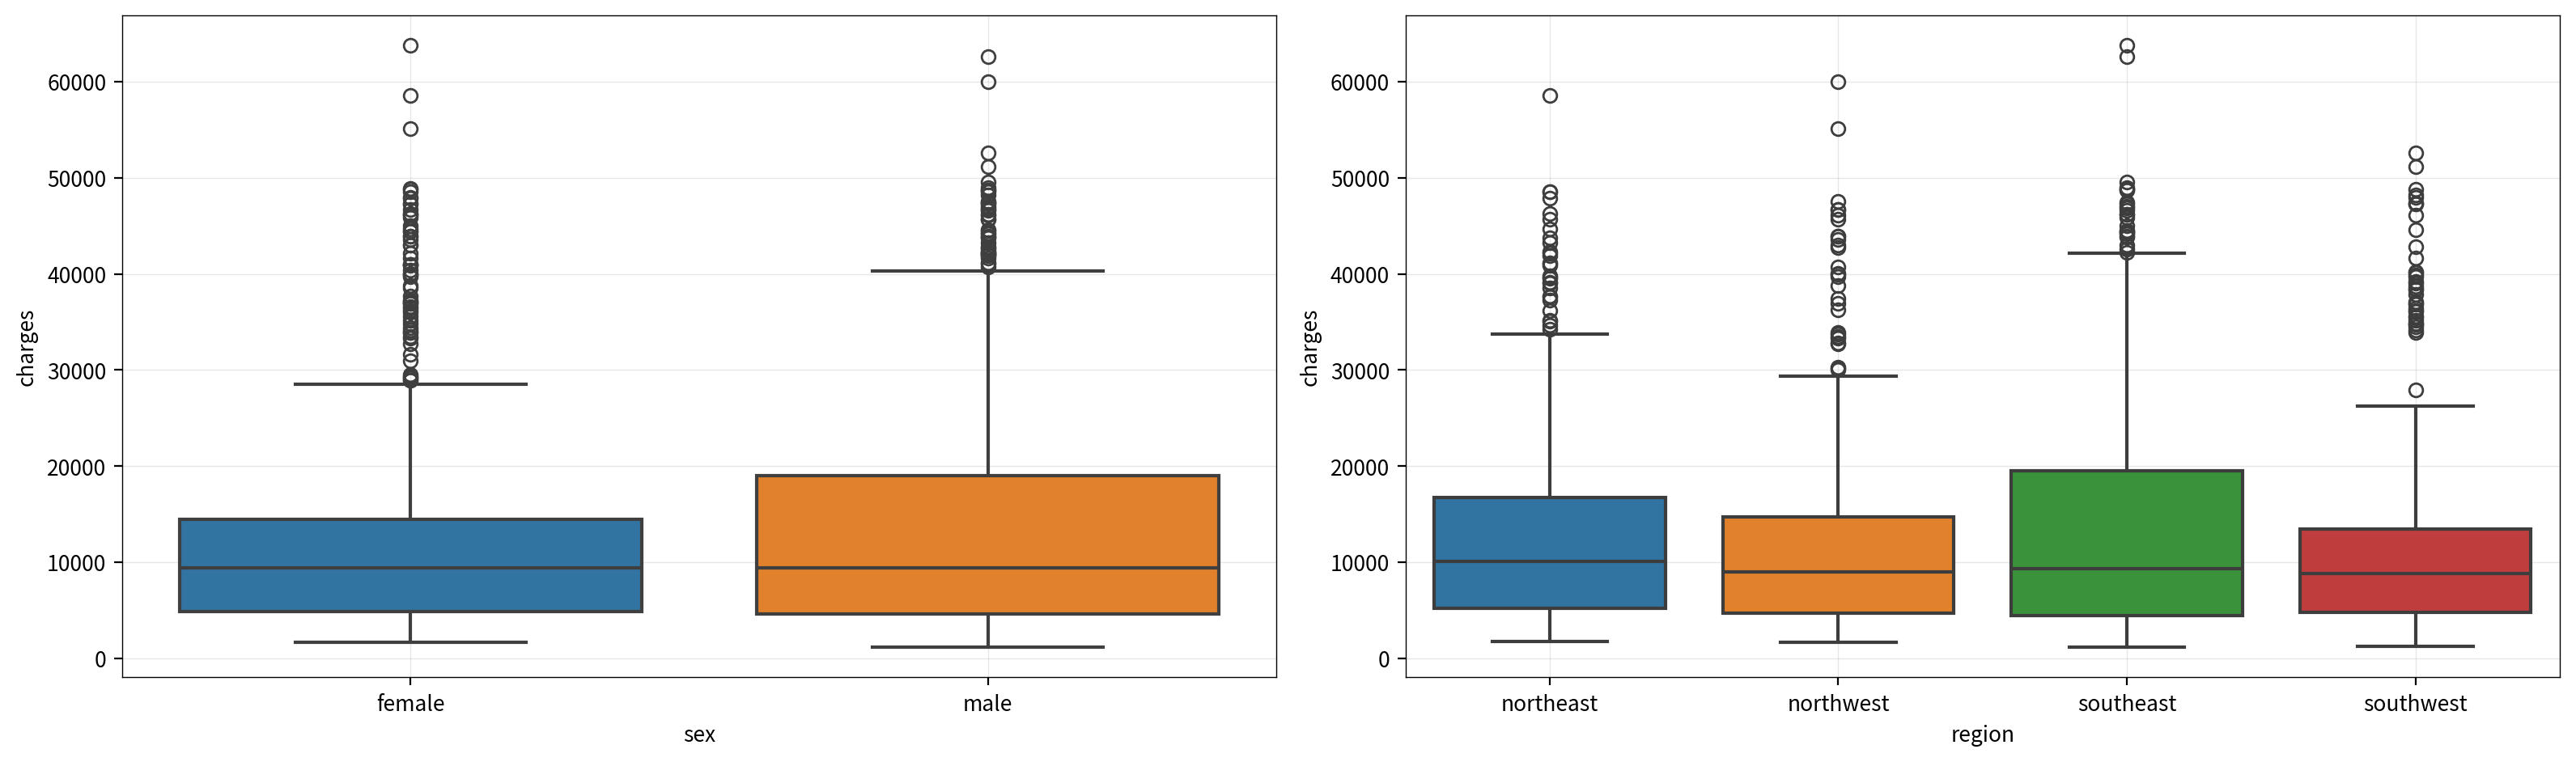

In [12]:
fig, ax = hs_plot.get_default_ax(rows=1, cols=2)

hs_plot.boxplot(origin, yname="charges", xname="sex", hue="sex", ax=ax[0])
hs_plot.boxplot(origin, yname="charges", xname="region", hue="region", ax=ax[1])

hs_plot.finalize_plot(ax)

In [13]:
df1 = hs_prep.log_transform(origin, "age", "bmi", "children", "charges")
df1

,age,sex,bmi,children,smoker,region,charges
0,2.944439,female,3.328627,0.000000,yes,southwest,9.734176
1,2.890372,male,3.519573,0.693147,no,southeast,7.453302
2,3.332205,male,3.496508,1.386294,no,southeast,8.400538
3,3.496508,male,3.122585,0.000000,no,northwest,9.998092
4,3.465736,male,3.363149,0.000000,no,northwest,8.260197
...,...,...,...,...,...,...,...
1333,3.912023,male,3.433019,1.386294,no,northwest,9.268661
1334,2.890372,female,3.463233,0.000000,no,northeast,7.698927
1335,2.890372,female,3.606856,0.000000,no,southeast,7.396233
1336,3.044522,female,3.250374,0.000000,no,southwest,7.604867


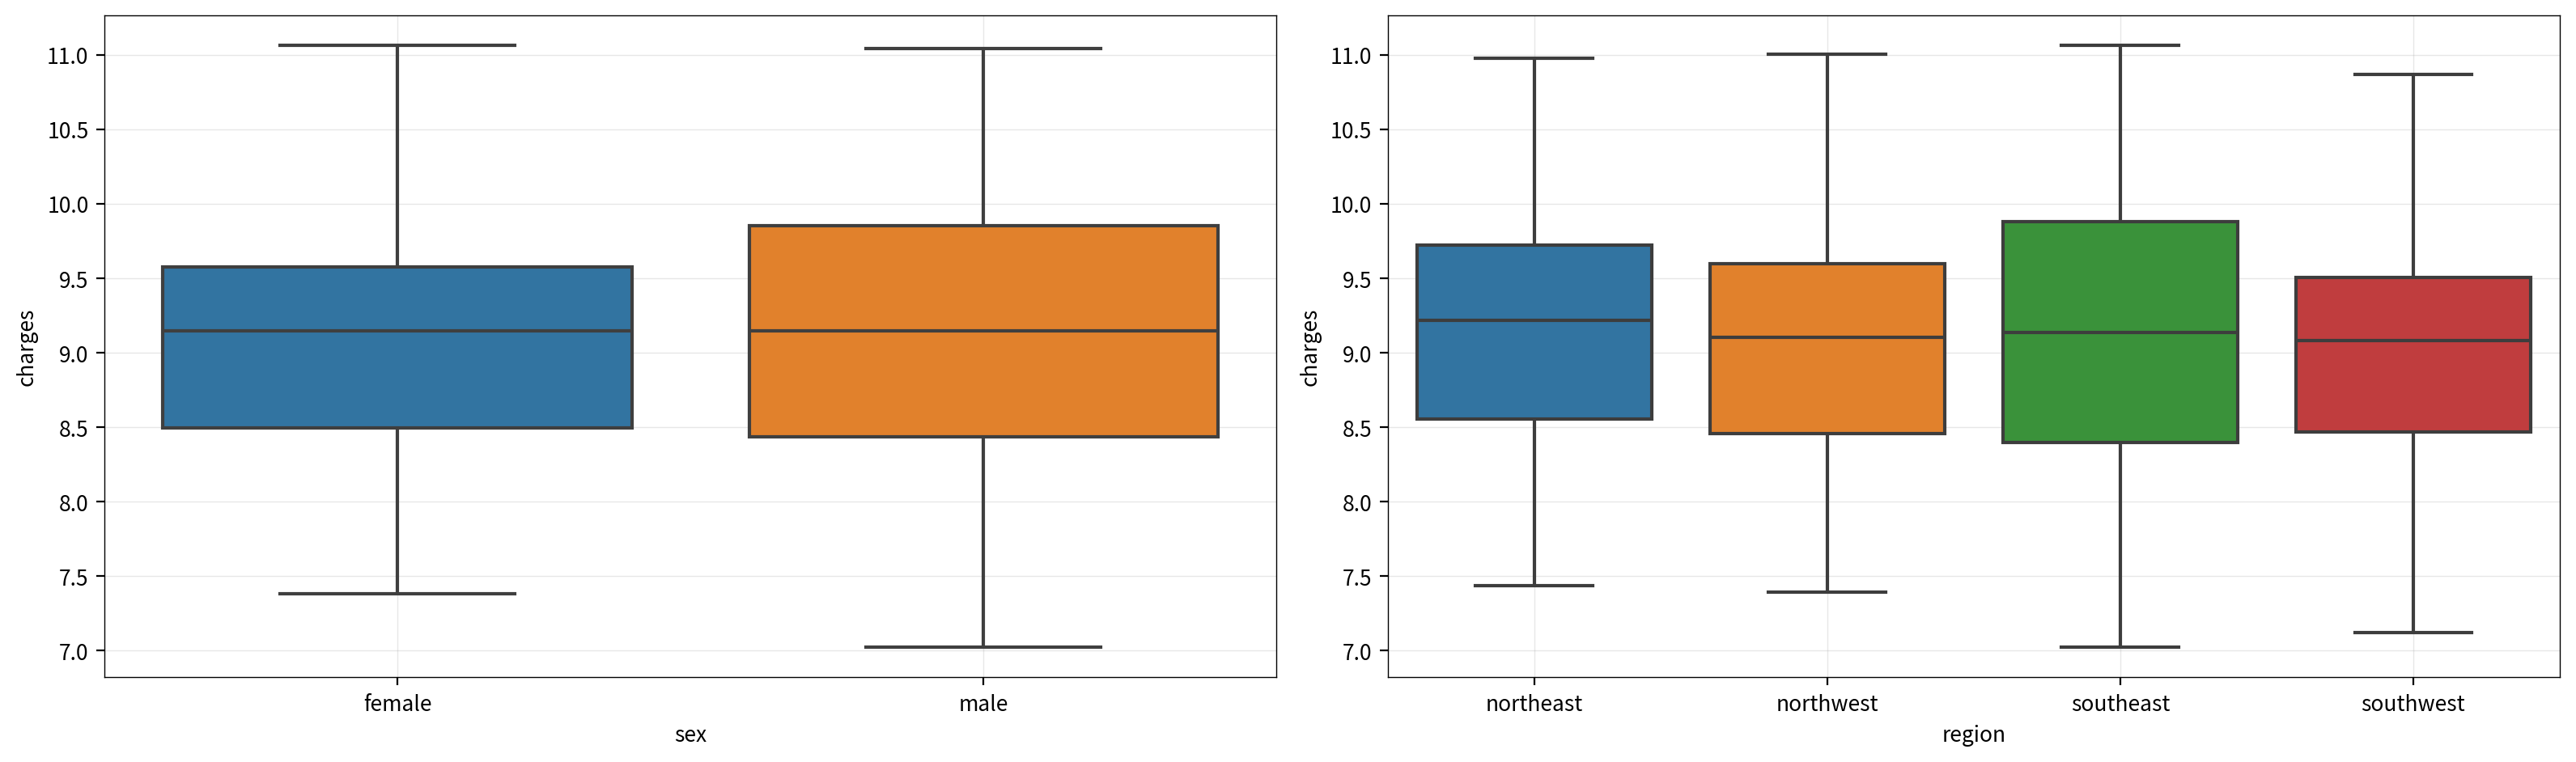

In [14]:
fig, ax = hs_plot.get_default_ax(rows=1, cols=2)

hs_plot.boxplot(df1, yname="charges", xname="sex", hue="sex", ax=ax[0])
hs_plot.boxplot(df1, yname="charges", xname="region", hue="region", ax=ax[1])

hs_plot.finalize_plot(ax)

## 미션 5. **"흡연은 정말로 의료비를 크게 높일까?"**

- smoker(흡연 여부)에 따라 charges가 다른지 시각화하고, 두 집단 평균 차이를 가설검정(예: t-test)으로 확인한다.
- 효과 크기(차이의 크기)를 함께 제시하고, "실제로 의미 있는 차이인가?"를 말로 해석하세요.
- 정규성/등분산 가정 점검 후 필요 시 Welch's t-test나 비모수 검정을 선택하세요.
- 효과 크기를 의료 정책 관점에서 의미를 서술합니다.

> 📌 **출제 의도**
> 두 집단 비교에서 **방법 선택과 효과 크기 해석**을 연습하고, 숫자를 의미로 번역하게 합니다.

In [15]:
df2 = hs_prep.unmelt(data=df1, id_vars="smoker", value_vars="charges")
df2

,no,yes
0,7.453302,9.734176
1,8.400538,10.233105
2,9.998092,10.586881
3,8.260197,10.514271
4,8.231275,10.537465
...,...,...
1059,9.342393,NaN
1060,9.268661,NaN
1061,7.698927,NaN
1062,7.396233,NaN


In [16]:
hs_stats.ttest_ind(df2["yes"], df2["no"])

statistic  p-value     H0     H1 interpretation  \
test           alternative                                                    
Welch's t-test two-sided       46.371      0.0  False   True   μ(x) != μ(y)   
               less            46.371      1.0   True  False   μ(x) >= μ(y)   
               greater         46.371      0.0  False   True    μ(x) > μ(y)   

                            equal_var_checked  
test           alternative                     
Welch's t-test two-sided                 True  
               less                      True  
               greater                   True

## 미션 6. **"나이대별로 의료비 차이가 뚜렷할까?"**

- age를 여러 구간으로 나누어(예: 18~30, 31~50, 51+) 각 연령대별 charges 분포를 시각화한다.
- 분산분석(ANOVA)으로 전체 차이를 확인하고, 사후검정으로 어느 연령대 사이에서 차이가 나는지 정리한다.
- 사후검정은 Tukey HSD 또는 Games-Howell(등분산 위반 시)을 사용하고, "의료비 연령 서열표" 형태로 요약하세요.

> 📌 **출제 의도**
> 여러 범주를 **전체→어디서 차이** 순서로 해석하며, 결과를 서열/지도처럼 정리하는 훈련입니다.

In [17]:
df3 = hs_prep.bin_continuous(
    df1, field="age", method="health_band", is_log_transformed=True, apply_labels=False
)
df3

,age,sex,bmi,children,smoker,region,charges,age_bin
0,2.944439,female,3.328627,0.000000,yes,southwest,9.734176,0~18
1,2.890372,male,3.519573,0.693147,no,southeast,7.453302,0~18
2,3.332205,male,3.496508,1.386294,no,southeast,8.400538,19-29
3,3.496508,male,3.122585,0.000000,no,northwest,9.998092,30-39
4,3.465736,male,3.363149,0.000000,no,northwest,8.260197,30-39
...,...,...,...,...,...,...,...,...
1333,3.912023,male,3.433019,1.386294,no,northwest,9.268661,40-49
1334,2.890372,female,3.463233,0.000000,no,northeast,7.698927,0~18
1335,2.890372,female,3.606856,0.000000,no,southeast,7.396233,0~18
1336,3.044522,female,3.250374,0.000000,no,southwest,7.604867,19-29


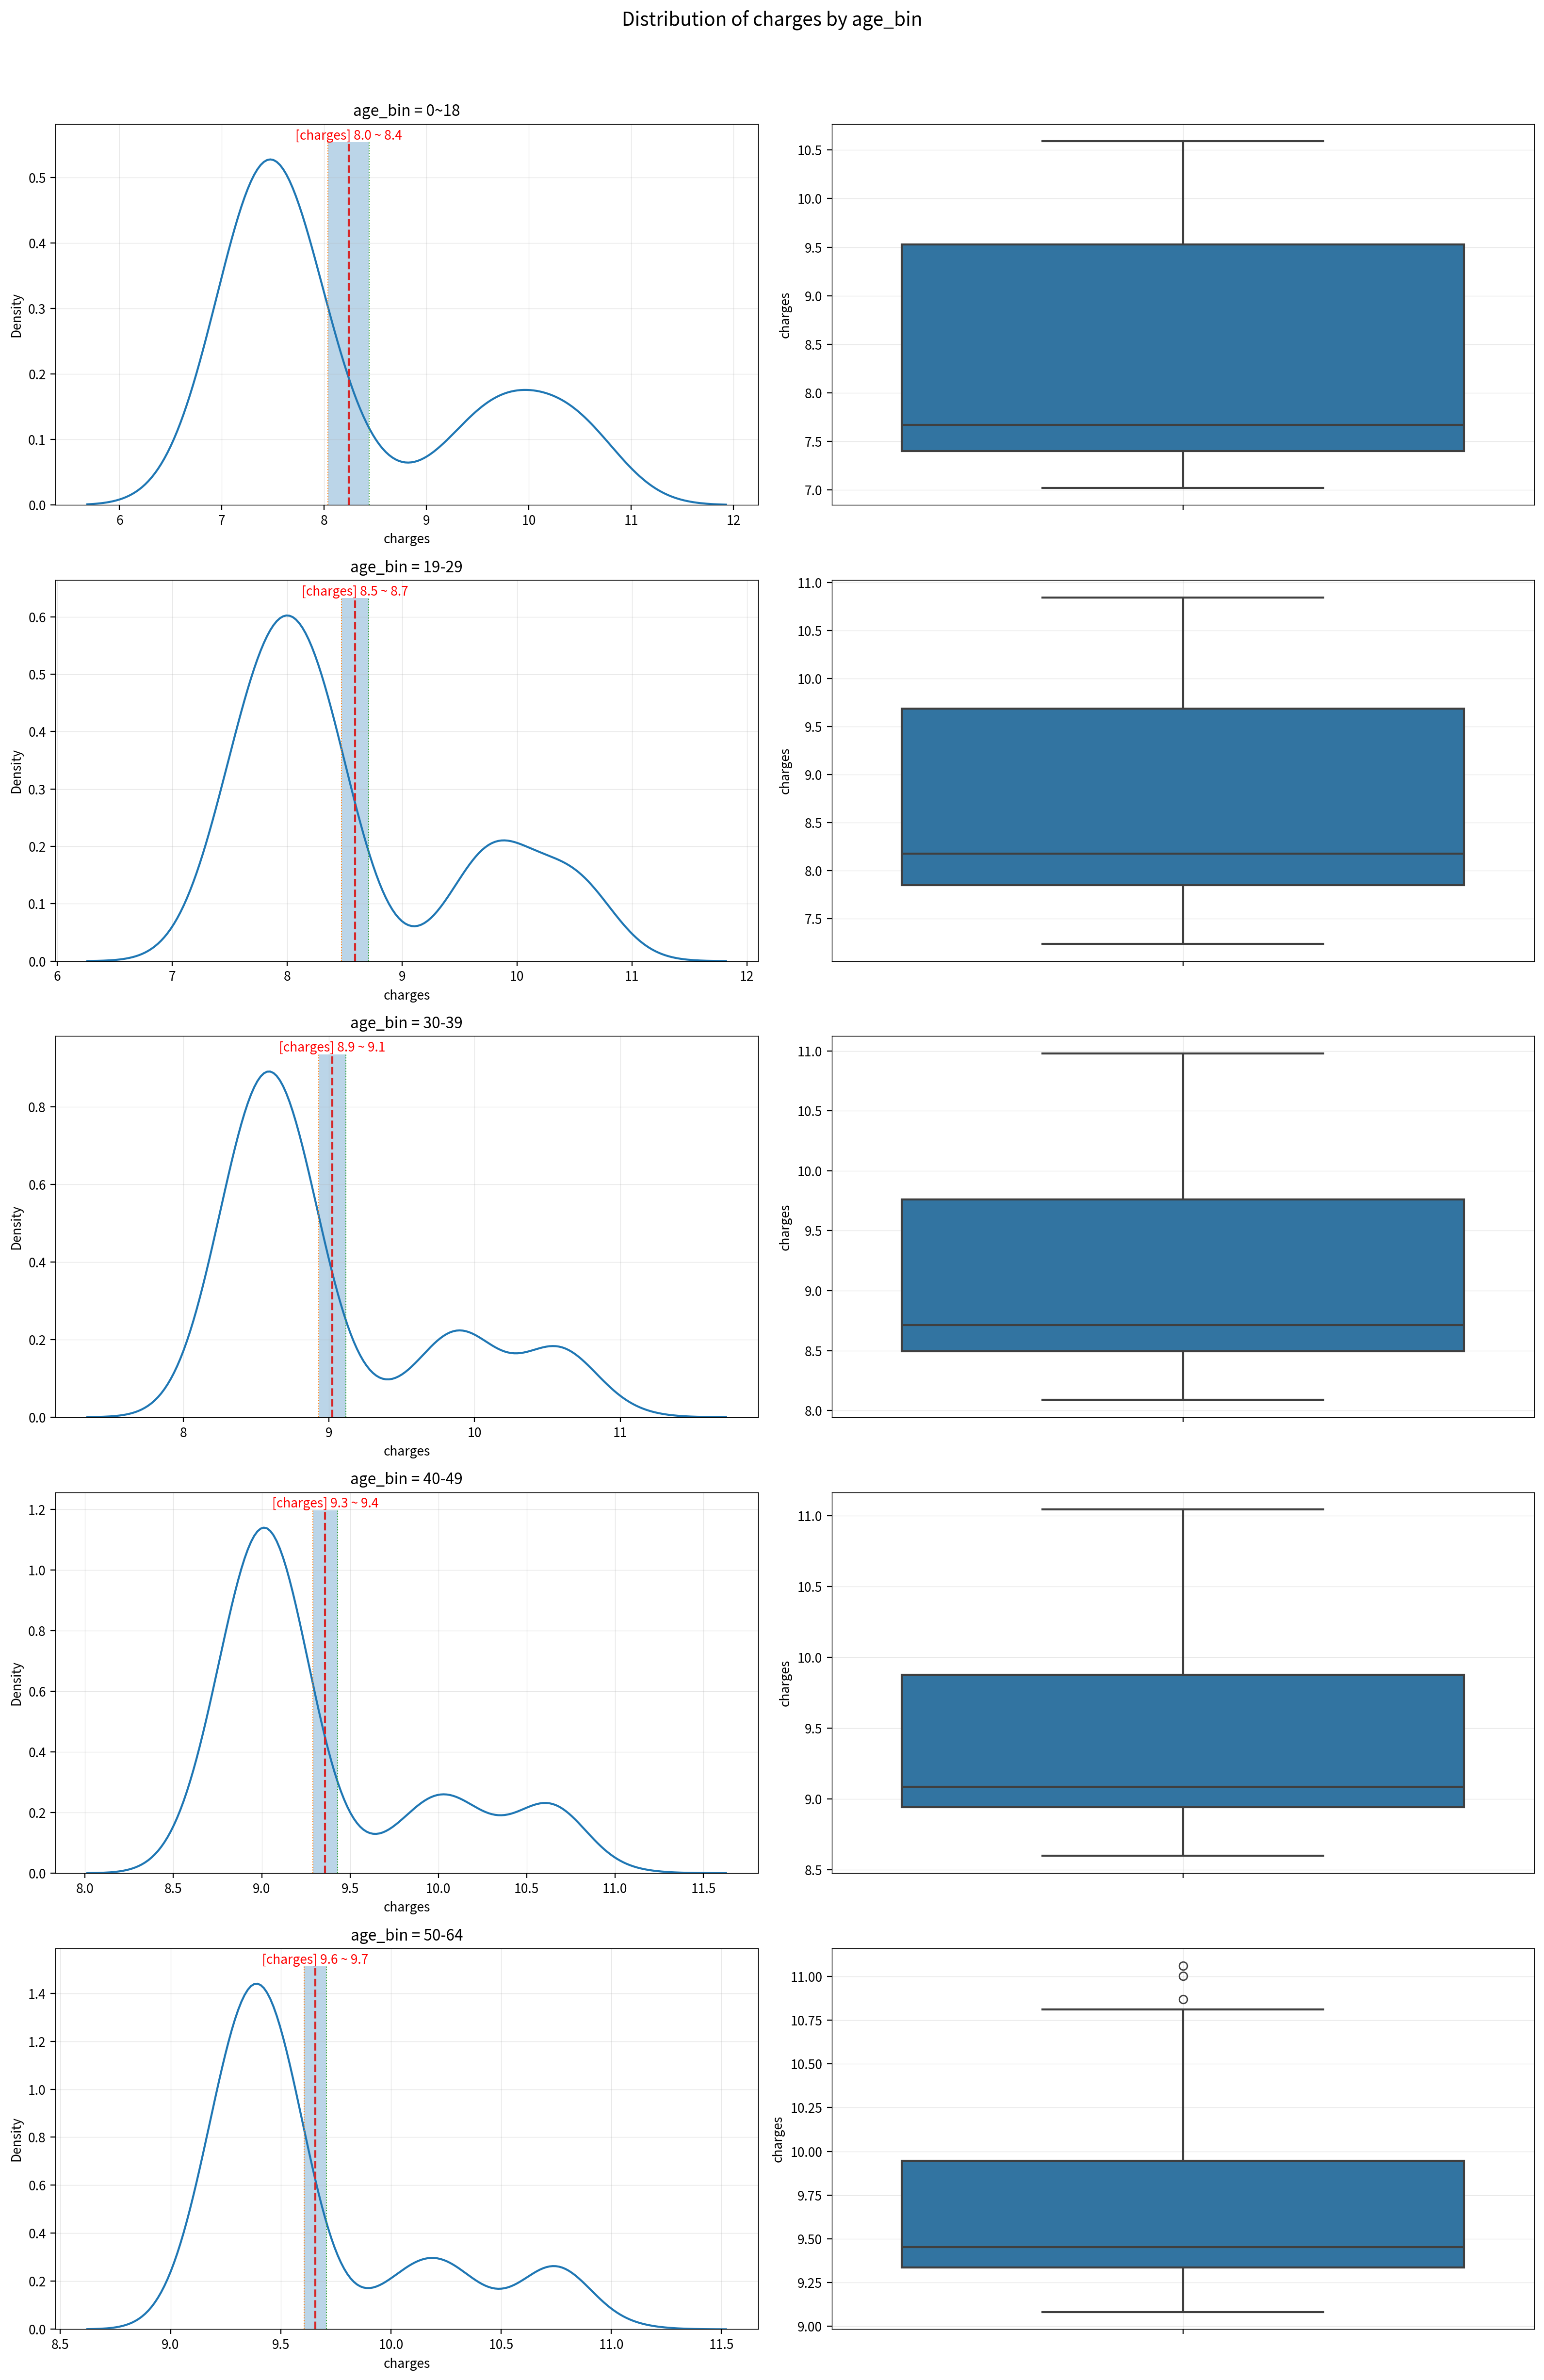

In [18]:
hs_plot.distribution_plot(df3, "charges", hue="age_bin")

## 미션 7. **"변수들은 서로 섞여 있을까?"**

- 주요 연속형 변수 간 상관행렬(age, bmi, children, charges)을 계산한다.
- 상관행렬을 히트맵으로 시각화하고, Variance Inflation Factor(VIF)로 다중공선성을 점검한다.
- age와 bmi 같이 약한 상관을 보이는 변수들이 모델에 주는 정보를 논의하세요.
- 공선성 문제가 없다면 그 이유를, 있다면 완화 전략(변수 제거, 결합지표, 정규화 회귀)을 비교하세요.

> 📌 **출제 의도**
> **중복 정보와 독립성**을 의식하며, 회귀에 넣을 변수를 깔끔히 설계하게 합니다.

## 미션 8. **"어떤 변수가 의료비와 가장 가까울까?"**

- charges와 age, bmi, children의 상관을 계산한다.
- Pearson과 Spearman을 모두 계산하고, 비교해 무엇이 더 적합한지 이유를 적으세요.
- 각 변수의 관계를 의료학·보건학적 언어로 해석하고(예: "나이가 많을수록 의료비 증가", "과체중(높은 BMI)은 의료비와 강한 관계"), 인과성을 말할 수 있는지 비판적으로 평가합니다.

> 📌 **출제 의도**
> 상관계수 선택 이유와 **수치→의미** 해석을 연습하며, 변수 설계의 근거를 쌓게 합니다.

## 미션 9. **"상관관계는 곧 원인일까?"**

- 지금까지의 탐색 결과를 바탕으로 "상관이 높다 = 원인이다"라는 착각을 피하자.
- 예: age와 charges의 높은 상관이 정말 나이 자체가 비용을 결정하는가, 아니면 나이가 **건강 상태의 대리변수**인가?
- smoker 효과: 흡연자는 정말 더 많이 병에 걸려서인가, 아니면 보험사의 **위험 평가 기준**인가?
- 데이터 수집 시점·의료 접근성 차이·미측정 변수(직업, 교육, 소득)가 결론에 주는 한계를 서술하세요.

> 📌 **출제 의도**
> 데이터가 말해 주는 것과 말하지 못하는 것을 구분하며, 신중한 해석의 중요성을 체감하게 합니다.

## 미션 10. **"의료비를 설명하는 회귀모형 설계"**

- charges(또는 변환값)를 종속변수로 하는 다중선형회귀를 설계한다.
- 변수 선택·변환·범주형 처리 이유를 명확히 한다.

※ 범주형 변수(sex, smoker, region)는 **더미 변수(기준 범주 명시)**로 처리하며, 기준 범주 선택 이유를 간단히 서술하세요.

> 📌 **출제 의도**
> 설계 선택이 임의가 아닌 **설명 의도**에 근거하도록 훈련합니다.

## 미션 11. **"회귀계수는 무엇을 말해주나?"**

- 계수(또는 표준화 계수)와 신뢰구간, 방향·크기를 해석한다.
- "나이가 1년 늘면 의료비가 어떻게 변하는가", "흡연자는 비흡연자보다 평균 얼마나 더 높은 비용을 지불하는가" 처럼 **물리/의료적 의미**로 번역한다.
- 변환 변수가 있다면, 변환을 감안한 해석을 명확히 쓴다.
- 표준화 계수(베타)와 비표준화 계수를 병행 제시하고, 단위/변환을 고려한 해석 문장을 명확히 작성합니다.
- 범주형 변수(sex, smoker, region)의 계수는 기준 범주 대비 효과로 명확히 해석하세요.

> 📌 **출제 의도**
> 숫자를 **의료비 구조의 언어**로 바꾸는 연습입니다.

## 미션 12. **"모형 진단과 개선"**

- 잔차 정규성/등분산/선형성, 영향력을 잔차플롯, Q-Q, Cook's distance 등으로 점검한다.
- 문제 지점(예: 극단적 고액 청구, 특정 집단에서의 체계적 오류)과 개선 아이디어(변환, 변수 교체/제거, 강건 회귀 등)를 제안한다.
- 분석 모형을 보고하고 해석하세요.

> 📌 **출제 의도**
> 점수보다 **가정·진단과 해석**을 통해 "얼마나 믿을 수 있는가"를 판단하게 합니다.

## 미션 13. **"같은 나이인데 왜 의료비는 다를까?"**

- age가 같은 두 가상의 개인을 설정하고(예: A는 비흡연 저BMI, B는 흡연 고BMI), 다른 변수 차이로 의료비 차이를 설명한다.
- 비전공자에게 이야기하듯, 모델이 설명하는 것과 못하는 것을 구분해 제시한다.
- 이야기의 흐름을 "데이터 관찰 → 회귀계수 → 의료비 차이 설명" 순서로 연결한다.
- 예시 틀: "두 사람 모두 40세이지만, A는 흡연하지 않고 BMI가 25인 반면 B는 흡연자이고 BMI가 35입니다. 모델에 따르면 B의 예상 의료비는 A보다 훨씬 높습니다. 왜냐하면 흡연이 [계수] 만큼 비용을 증가시키고, BMI 1 증가가 [계수] 만큼 증가시키기 때문입니다. 하지만 이 모델은 개인의 건강 이력, 유전 요인, 직업 스트레스 같은 정보를 담지 못합니다."
- 모델이 설명하지 못한 요인(개인 건강 이력, 유전 요인, 사회경제적 지위, 의료 접근성 등)의 가능성도 덧붙여 설득력을 높입니다.

> 📌 **출제 의도**
> 지금까지의 분석을 **스토리로 엮어** 설득력 있게 전달하는 마무리입니다. 모델이 말하는 것과 말하지 못하는 것을 구분해 주세요.